# Lab 8


## Setup for SUSY Dataset

Use the SUSY dataset for the rest of this lab. Here is a basic setup.

In [3]:
##I dont know why but I can sometimes get the code to run but at other times it keeps crashing and I dont know what to do to fix this

In [ ]:
##like it ran everything before but when i went to go run it again it would crash in some sections.

In [4]:
# Our usual libraries...
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import HTML, display
import tabulate

In [5]:
filename="SUSY.csv"
VarNames=["signal", "l_1_pT", "l_1_eta","l_1_phi", "l_2_pT", "l_2_eta", 
          "l_2_phi", "MET", "MET_phi", "MET_rel", "axial_MET",
          "M_R", "M_TR_2", "R", "MT2", "S_R", "M_Delta_R", "dPhi_r_b", "cos_theta_r1"]
df = pd.read_csv(filename, dtype='float64', names=VarNames)

In [6]:
df_sig=df[df.signal==1]
df_bkg=df[df.signal==0]

print(df_sig.shape)
print(df_bkg.shape)

(2287827, 19)
(2712173, 19)


## Scikit-Learn

[Scikit-learn](http://scikit-learn.org) is a rich python library for data science, including machine learning. For example, we can build a Fisher Discriminant (aka Linear Discriminant Analysis, or LDA). 

### Exercise 1: Install Scikit-Learn

Follow the [Installation Instructions](https://scikit-learn.org/stable/install.html) and install `scikit-learn` in your environment.

In [7]:
pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


### Exercise 2: Read About Classifiers

#### Part a
Scikit-learn offers an impressively comprehensive list of machine learning algorithms. Browse through [scikit-learn's documentation](https://scikit-learn.org/stable/index.html). You'll note the algorithms are organized into classification, regression, clustering, dimensionality reduction, model selection, and preprocessing. Browse through the list of [classification algorithms](https://scikit-learn.org/stable/supervised_learning.html#supervised-learning). 

#### Part b
Note scikit-learn's documentation is rather comprehensive. The documentation on [linear models](https://scikit-learn.org/stable/modules/linear_model.html) shows how classification problems are setup. Read about the first few methods and try to comprehend the example codes. Skim the rest of the document.

#### Part c
Read through the [LDA Documentation](https://scikit-learn.org/stable/modules/lda_qda.html).


### Exercise 3: Training a Classifier

Lets' repeat what we did manually in the previous lab using scikit-learn. We'll use a LDA classifier, which we can instanciate as follows:

In [8]:
import sklearn.discriminant_analysis as DA
Fisher=DA.LinearDiscriminantAnalysis()

As discussed in the lecture, to properly formulate our problem, we'll have to:

* Define the inputs (X) vs outputs (Y)
* Designate training vs testing samples (in order to get a unbias assessment of the performance of Machine Learning algorithms)

for example, here we'll take use 4M events for training and the remainder for testing.

In [9]:
N_Train=4000000

Train_Sample=df[:N_Train]
Test_Sample=df[N_Train:]

X_Train=Train_Sample[VarNames[1:]]
y_Train=Train_Sample["signal"]

X_Test=Test_Sample[VarNames[1:]]
y_Test=Test_Sample["signal"]

Test_sig=Test_Sample[Test_Sample.signal==1]
Test_bkg=Test_Sample[Test_Sample.signal==0]


In [10]:
print("X_Train shape:", X_Train.shape)
print("y_Train shape:", y_Train.shape)

X_Train shape: (4000000, 18)
y_Train shape: (4000000,)


We can train the classifier as follow:

In [ ]:
Fisher.fit(X_Train,y_Train)

In [12]:
Fisher.predict(X_Test)

array([0., 0., 1., ..., 0., 1., 0.])

We can plot the output, comparing signal and background:

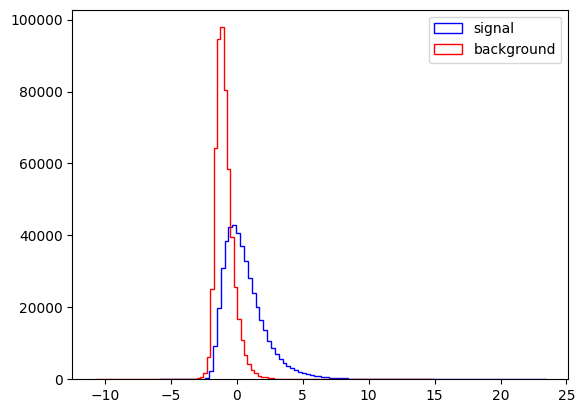

In [13]:
plt.figure()
plt.hist(Fisher.decision_function(Test_sig[VarNames[1:]]),bins=100,histtype="step", color="blue", label="signal",stacked=True)
plt.hist(Fisher.decision_function(Test_bkg[VarNames[1:]]),bins=100,histtype="step", color="red", label="background",stacked=True)
plt.legend(loc='upper right')
plt.show()

#### Part a

Compare ROC curves computed on the test versus training samples, in a single plot. Do you see a bias?

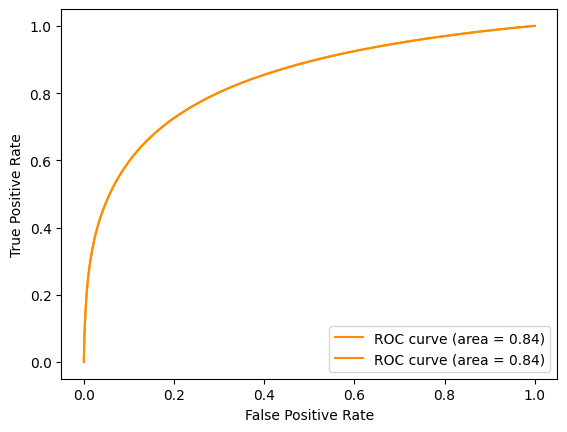

In [14]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, _ = roc_curve(y_Test, Fisher.decision_function(X_Test))
roc_auc = auc(fpr, tpr)

fpr_train, tpr_train, _ = roc_curve(y_Train, Fisher.decision_function(X_Train))
roc_auc_train = auc(fpr_train, tpr_train)

plt.plot(fpr_train,tpr_train,color='darkorange',label='ROC curve (area = %0.2f)' % roc_auc_train)
plt.plot(fpr,tpr,color='darkorange',label='ROC curve (area = %0.2f)' % roc_auc)
plt.legend(loc="lower right")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.show()
#no bias

#### Part b

Train the Fisher performance of using the raw, features, and raw+features as input. Compare the performance one a single plot. 

In [ ]:
RawNames=["l_1_pT", "l_1_eta","l_1_phi", "l_2_pT", "l_2_eta", "l_2_phi", "MET", "MET_phi"]

FeatureNames=list(set(VarNames[1:]).difference(RawNames))

X_RawNames = df[RawNames]
X_FeatureNames = df[FeatureNames]

X_VarNames = df[VarNames[1:]] 
y_VarNames=df["signal"]

Fisher_RawNames = DA.LinearDiscriminantAnalysis()
Fisher_FeatureNames = DA.LinearDiscriminantAnalysis()
Fisher_VarNames = DA.LinearDiscriminantAnalysis() 

Fisher_RawNames.fit(X_RawNames, y_VarNames)
Fisher_FeatureNames.fit(X_FeatureNames, y_VarNames)
Fisher_VarNames.fit(X_VarNames, y_VarNames)

RawNames_probs = Fisher_RawNames.predict_proba(X_RawNames)[:, 1]
FeatureNames_probs = Fisher_FeatureNames.predict_proba(X_FeatureNames)[:, 1]
VarNames_probs = Fisher_VarNames.predict_proba(X_VarNames)[:, 1]

fpr_RawNames, tpr_RawNames, _=roc_curve(y_VarNames, RawNames_probs)
roc_auc_RawNames=auc(fpr_RawNames, tpr_RawNames)

fpr_FeatureNames, tpr_FeatureNames, _=roc_curve(y_VarNames, FeatureNames_probs)
roc_auc_FeatureNames=auc(fpr_FeatureNames, tpr_FeatureNames)

fpr_VarNames, tpr_VarNames, _=roc_curve(y_VarNames, VarNames_probs)
roc_auc_VarNames=auc(fpr_VarNames, tpr_VarNames)

plt.figure(figsize=(10, 7))

plt.plot(fpr_RawNames, tpr_RawNames, color='purple', lw=2, label='Raw ROC(AUC = %0.2f)' % roc_auc_RawNames)
plt.plot(fpr_FeatureNames, tpr_FeatureNames, color='blue', lw=2, label='Feature ROC(AUC = %0.2f)' % roc_auc_FeatureNames)
plt.plot(fpr_VarNames, tpr_VarNames, color='green', lw=2, label='Raw+Feature ROC(AUC = %0.2f)' % roc_auc_VarNames)

plt.plot([0, 1], [0, 1], color='red', lw=1, linestyle='--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curves of Raw, Features, & Raw+Features')
plt.legend(loc="lower right")
plt.show()

### Exercise 4: Comparing Techniques

#### Part a
Select 3 different classifiers from the techniques listed [here](http://scikit-learn.org/stable/supervised_learning.html#supervised-learning) to compare. Note that you can use the multi-layer perceptron to build a deep network, though training may be prohibitively slow. So avoid this technique.

#### Part b

Write a function that takes an instantiated classifier and performs the comparison from part 3b. Use the function on your choice of functions in part a.

#### Part c

Use the best method from part c to compute the maximal significance $\sigma_S= \frac{N_S}{\sqrt{N_S+N_B}}$ for the scenarios in lab 5.

In [17]:
import sklearn.linear_model as LM #logistic regression
import sklearn.neighbors as NN #nearest neighbors
import sklearn.tree as tree #decision trees
import sklearn.metrics as metrics

def compare_roc(classifier, X, y):
    classifier.fit(X, y)
    probs=classifier.predict_proba(X)[:, 1] 
    fpr, tpr, _=metrics.roc_curve(y, probs) 
    roc_auc=metrics.auc(fpr, tpr) 

    return fpr, tpr, roc_auc

decision_tree=tree.DecisionTreeClassifier()
knn_classifier=NN.KNeighborsClassifier()
logistic_regression=LM.LogisticRegression()

classifiers=[
    decision_tree,
    knn_classifier,
    logistic_regression
]

classifier_names=[
    "Decision Tree",
    "K-Nearest Neighbors",
    "Logistic Regression"
]

all_fprs, all_tprs, all_aucs=[], [], []

In [19]:
VarNames=["signal", "l_1_pT", "l_1_eta", "l_1_phi", "l_2_pT", "l_2_eta", "l_2_phi", "MET", "MET_phi", "MET_rel",
            "axial_MET", "M_R", "M_TR_2", "R", "MT2", "S_R", "M_Delta_R", "dPhi_r_b", "cos_theta_r1"]
RawNames=["l_1_pT", "l_1_eta", "l_1_phi", "l_2_pT", "l_2_eta", "l_2_phi", "MET", "MET_phi"]
FeatureNames=list(set(VarNames[1:]).difference(RawNames))

X_raw=df[RawNames] #raw
y=df["signal"]
X_features=df[FeatureNames] #features
X_raw_and_features = df[VarNames[1:]]

In [20]:
print("Number of features in X_raw:", X_raw.shape[1])
print("Number of features in X_test:", X_Test.shape[1])
print("Feature names in X_raw:", X_raw.columns.tolist())
print("Feature names in X_test:", X_Test.columns.tolist())
missing_features=['MET_rel', 'axial_MET', 'M_R', 'M_TR_2', 'R', 'MT2', 'S_R', 'M_Delta_R', 'dPhi_r_b', 'cos_theta_r1']

for feature in missing_features:
    X_raw[feature]=0

X_raw=X_raw[X_Test.columns]

Number of features in X_raw: 8
Number of features in X_test: 18
Feature names in X_raw: ['l_1_pT', 'l_1_eta', 'l_1_phi', 'l_2_pT', 'l_2_eta', 'l_2_phi', 'MET', 'MET_phi']
Feature names in X_test: ['l_1_pT', 'l_1_eta', 'l_1_phi', 'l_2_pT', 'l_2_eta', 'l_2_phi', 'MET', 'MET_phi', 'MET_rel', 'axial_MET', 'M_R', 'M_TR_2', 'R', 'MT2', 'S_R', 'M_Delta_R', 'dPhi_r_b', 'cos_theta_r1']


/tmp/ipykernel_231102/2261107334.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_raw[feature]=0
/tmp/ipykernel_231102/2261107334.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_raw[feature]=0
/tmp/ipykernel_231102/2261107334.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-

In [ ]:
plt.figure(figsize=(4, 4))
for classifier, name in zip(classifiers, classifier_names):
    fpr, tpr, roc_auc=compare_roc(classifier, X_raw, y) # compares
    all_fprs.append(fpr)
    all_tprs.append(tpr)
    all_aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=2, label="%s (AUC = %0.2f)" % (name, roc_auc))

plt.plot([0, 1], [0, 1], color="blue", lw=1, linestyle="--")
plt.xlim([0.0, 2.0])
plt.ylim([0.0, 2.0])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (Raw Features)")
plt.legend(loc="lower right")
plt.show()

### Exercise 5: Metrics

Scikit-learn provides methods for computing the FPR, TPR, ROC, AUC metrics. For example:

In [1]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, _ = roc_curve(y_Test, Fisher.decision_function(X_Test))

roc_auc = auc(fpr, tpr)

plt.plot(fpr,tpr,color='darkorange',label='ROC curve (area = %0.2f)' % roc_auc)
plt.legend(loc="lower right")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.show()

NameError: name 'y_Test' is not defined


#### Part a
TPR/FPR/ROC/AUC are one way of assessing the quality of a classifier. Read about [Precision and Recall](https://en.wikipedia.org/wiki/Precision_and_recall), [Accuracy](https://en.wikipedia.org/wiki/Accuracy_and_precision), and [F-score](https://en.wikipedia.org/wiki/F-score).

#### Part b
Look through [model evaluation](https://scikit-learn.org/stable/modules/model_evaluation.html#) documentation. Using scikit-learns tools, compute TPR, FPR, ROC, AUC, Precision, Recall, F1 score, and accuracy for the method you selected in 4c above and each scenario. Make a nice table, which also includes the maximal significance. 


In [2]:
from sklearn.metrics import f1_score
f1_score(y_Test, Fisher.predict(X_Test,))

NameError: name 'y_Test' is not defined

In [3]:
X_sig = X_Test[y_Test==1]
y_sig = y_Test[y_Test==1]

X_bkg = X_Test[y_Test==0]
y_bkg = y_Test[y_Test==0]

print("Sig f1 score:", f1_score(y_sig, Fisher.predict(X_sig)))
print("Bkg f1 score:", f1_score(y_bkg, Fisher.predict(X_bkg)))

N_sig=1000
N_bkg=100000
X_mix = np.concatenate((X_sig[:N_sig],X_bkg[:N_bkg]))
y_mix = np.concatenate((y_sig[:N_sig],y_bkg[:N_bkg]))

print("Mix f1 score:", f1_score(y_mix, Fisher.predict(X_mix)))

NameError: name 'X_Test' is not defined